<a href="https://colab.research.google.com/github/willyptrain/cs4774-mask-detection/blob/main/wider_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Colab stuff
from google.colab import drive
drive.mount("/content/drive/")


!unzip 'drive/My Drive/wider_face_split' 
!unzip 'drive/My Drive/WIDER_train' 
!unzip 'drive/My Drive/WIDER_val' 
!unzip 'drive/My Drive/WIDER_test'


# train_images = np.load("WIDER_train_images.npy")
# print(train_images.shape)

# np.savez_compressed("wider_train_compressed", train_images)

# val_images = np.load("WIDER_val_images.npy")
# np.savez_compressed("wider_val_compressed", val_images)
# print(val_images.shape)

# !cp "/content/wider_train_compressed.npz" "/content/drive/My Drive/wider_train_compressed.npz"
# !cp "/content/wider_val_compressed.npz" "/content/drive/My Drive/wider_val_compressed.npz"





Streaming output truncated to the last 5000 lines.
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_312.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_315.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_32.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_322.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_325.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_326.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_33.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_335.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_341.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_347.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_354.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_358.jpg  
  inflating: WI

In [ ]:


# Machine Learning Homework 4 - Image Classification

__author__ = 'wcp7cp'

# General imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
import os
import sys
import pandas as pd

# Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier

import scipy.io as sio
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import cv2


In [ ]:

def load_and_write_data(folder, save=True):
  x = np.array([])
  y = []
  index = 0
  img_paths = []
  for subfolder in os.listdir('/content/'+folder+'/images'):
      for path in os.listdir('/content/'+folder+'/images/'+subfolder):
        img_path = '/content/'+folder+'/images/' + subfolder + "/" + path
        img_paths.append(img_path)
        # img = cv2.resize(cv2.imread(img_path), (320,320))
        # if(index == 0):
        #   x = np.array([img])
        # else:
        #   x = np.append(x, [img], axis=0)
        index += 1
        print(index)
  print(x.shape)
  if(save):
    np.save('/content/'+folder+"_images.npy", x)
  return img_paths 


train_paths = load_and_write_data("WIDER_train", save=False)
val_paths = load_and_write_data("WIDER_val", save=False)

# with open('/content/drive/My Drive/train_img_paths.txt','w') as f:
#   for path in train_paths:
#     f.write(path+"\n")

# with open('/content/drive/My Drive/val_img_paths.txt','w') as f:
#   for path in val_paths:
#     f.write(path+"\n")


Streaming output truncated to the last 5000 lines.
11110
11111
11112
11113
11114
11115
11116
11117
11118
11119
11120
11121
11122
11123
11124
11125
11126
11127
11128
11129
11130
11131
11132
11133
11134
11135
11136
11137
11138
11139
11140
11141
11142
11143
11144
11145
11146
11147
11148
11149
11150
11151
11152
11153
11154
11155
11156
11157
11158
11159
11160
11161
11162
11163
11164
11165
11166
11167
11168
11169
11170
11171
11172
11173
11174
11175
11176
11177
11178
11179
11180
11181
11182
11183
11184
11185
11186
11187
11188
11189
11190
11191
11192
11193
11194
11195
11196
11197
11198
11199
11200
11201
11202
11203
11204
11205
11206
11207
11208
11209
11210
11211
11212
11213
11214
11215
11216
11217
11218
11219
11220
11221
11222
11223
11224
11225
11226
11227
11228
11229
11230
11231
11232
11233
11234
11235
11236
11237
11238
11239
11240
11241
11242
11243
11244
11245
11246
11247
11248
11249
11250
11251
11252
11253
11254
11255
11256
11257
11258
11259
11260
11261
11262
11263
11264
11265
11266
11267
1

In [ ]:
train_img_paths = []
val_img_paths = []

with open('/content/drive/My Drive/train_img_paths.txt','r') as f:
  for line in f:
    train_img_paths.append(line.rstrip("\n"))
    

with open('/content/drive/My Drive/val_img_paths.txt','r') as f2:
    for line in f2:
      val_img_paths.append(line.rstrip("\n"))

print(len(train_img_paths))
print(len(val_img_paths))

12880
3226


In [ ]:
# import glob

# def load_mat(filename, folder):
#   count = 0
#   mat_contents = sio.loadmat(filename)
#   bbox = {}
#   bbox_y = []
#   sizes = {}
#   for i in range(0, len(mat_contents['file_list'])):
#     print(i)
#     for c in range(0, len(mat_contents['file_list'][i])):
#       for y in range(0, len(mat_contents['file_list'][i][c])):
#         image_file = mat_contents['file_list'][i][c][y][0][0]
#         count += 1
#         bbox[image_file] = mat_contents['face_bbx_list'][i][c][y]
#         bbox_y.append(mat_contents['face_bbx_list'][i][c][y])
#         folder_prefix = image_file.split("_")[0]
#         img_path = glob.glob(folder + folder_prefix+'--*', recursive=True)[0] + "/"
#         img = cv2.imread(img_path+image_file+".jpg")
#         h, w, dim = img.shape
#         sizes[image_file] = {"h": h, "w": w, "dim": dim}
#         mat_contents['face_bbx_list'][i][c][y][0] = mat_contents['face_bbx_list'][i][c][y][0] / [w, h, h, w]
#         # mat_contents['face_bbx_list'][i][c][y][0][:,1] /= h
#         # mat_contents['face_bbx_list'][i][c][y][0][:,2] /= h
#         # mat_contents['face_bbx_list'][i][c][y][0][:,3] /= w

#   return bbox, bbox_y, sizes
      
# train_file = "wider_face_split/wider_face_train.mat"
# val_file = "wider_face_split/wider_face_val.mat"
# test_file = "wider_face_split/wider_face_test.mat"

# train_boxes, train_y, sizes_train = load_mat(train_file, folder="/content/WIDER_train/images/")
# val_boxes, val_y, sizes_val = load_mat(val_file, folder="/content/WIDER_val/images/")


In [ ]:
import glob


def load_mat(filename, folder):
  count = 0
  mat_contents = sio.loadmat(filename)
  bbox = {}
  bbox_y = []
  sizes = {}
  for i in range(0, len(mat_contents['file_list'])):
    print(i)
    for c in range(0, len(mat_contents['file_list'][i])):
      for y in range(0, len(mat_contents['file_list'][i][c])):
        image_file = mat_contents['file_list'][i][c][y][0][0]
        count += 1
        # bbox[image_file] = mat_contents['face_bbx_list'][i][c][y]
        folder_prefix = image_file.split("_")[0]
        img_path = glob.glob(folder + folder_prefix+'--*', recursive=True)[0] + "/"
        img = cv2.imread(img_path+image_file+".jpg")
        h, w, dim = img.shape
        sizes[image_file] = {"h": h, "w": w, "dim": dim}
        # print(image_file,mat_contents['face_bbx_list'][i][c][y][0][:,2])
        # mat_contents['face_bbx_list'][i][c][y][0][:,2] = mat_contents['face_bbx_list'][i][c][y][0][:,0] + mat_contents['face_bbx_list'][i][c][y][0][:,2]
        # mat_contents['face_bbx_list'][i][c][y][0][:,3] = mat_contents['face_bbx_list'][i][c][y][0][:,1] + mat_contents['face_bbx_list'][i][c][y][0][:,3]
        mat_contents['face_bbx_list'][i][c][y][0] = mat_contents['face_bbx_list'][i][c][y][0] / [w, h, h, w]
        bbox[image_file] = mat_contents['face_bbx_list'][i][c][y]


  return bbox, sizes
      
train_file = "wider_face_split/wider_face_train.mat"
val_file = "wider_face_split/wider_face_val.mat"
test_file = "wider_face_split/wider_face_test.mat"

train_boxes, sizes_train = load_mat(train_file, folder="/content/WIDER_train/images/")
val_boxes, sizes_val = load_mat(val_file, folder="/content/WIDER_val/images/")



  


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


In [ ]:
y_train = []
y_val = []
index = 0
with open('/content/drive/My Drive/train_annotations.txt','w') as f:
  for path in train_img_paths:
    folder_img_path = "./" + "/".join(path.split("/")[1:])
    img_path = path.split("/")[-1].rstrip(".jpg")
    string_form = " ".join([(",".join(map(str,box)) + ",0") for box in list(train_boxes[img_path][0])])
    # if(string_form != "0,0,0,0,0"):
      # index += 1
      # print(index)
      # f.write(folder_img_path + " " + string_form + "\n")
    y_train.append(train_boxes[img_path])
    
    
f.close()    

index = 0
with open('/content/drive/My Drive/val_annotations.txt','w') as f:
  for path in val_img_paths:
    folder_img_path = "./" + "/".join(path.split("/")[1:])
    img_path = path.split("/")[-1].rstrip(".jpg")
    string_form = " ".join([(",".join(map(str,box)) + ",0") for box in list(val_boxes[img_path][0])])
    # if(string_form != "0,0,0,0,0"):
      # index += 1
      # print(index)
      # f.write(folder_img_path + " " + string_form + "\n")
    
    y_val.append(val_boxes[img_path])
    
f.close()

y_train = np.array(y_train)
y_val = np.array(y_val)

print(y_train.shape, y_val.shape)





(12880, 1) (3226, 1)


In [ ]:
train_images = None
val_images = None

with np.load("/content/drive/My Drive/wider_val_compressed.npz") as f:
  val_images = f['arr_0']

print(val_images.shape)

with np.load("/content/drive/My Drive/wider_train_compressed.npz") as f:
  train_images = f['arr_0']


print(train_images.shape)



(3226, 320, 320, 3)
(12880, 320, 320, 3)


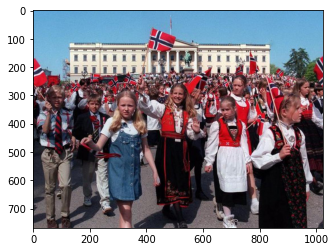

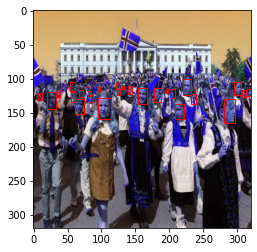

In [ ]:

index = 1
test_file = train_img_paths[index]
parse_name = test_file.split("/")[-1].rstrip(".jpg")
im = np.array(Image.open(test_file), dtype=np.uint8)

fig,ax = plt.subplots(1)
ax.imshow(im)

for c in range(0, len(train_boxes[parse_name][0])):
  shape_vec = [sizes_train[parse_name]['w'], sizes_train[parse_name]['h'], sizes_train[parse_name]['h'], sizes_train[parse_name]['w']]
  # xmin, ymin, height, width = train_boxes[parse_name][0][c] * shape_vec
  xmin, ymin, xmax, ymax = train_boxes[parse_name][0][c]
  rect = patches.Rectangle((xmin,ymin),(xmax - xmin),(ymax - ymin),linewidth=1,edgecolor='r',facecolor='none')
  ax.add_patch(rect)

plt.show()


numpy_im = train_images[index]

fig,ax = plt.subplots(1)
ax.imshow(numpy_im)

for c in range(0, len(train_boxes[parse_name][0])):
  
  ratio = sizes_train[parse_name]['w'] / sizes_train[parse_name]['h']
  shape_vec = [320, 320, 320/ratio, 320*ratio]
  xmin, ymin, height, width = train_boxes[parse_name][0][c] * shape_vec
  rect = patches.Rectangle((xmin,ymin),height,width,linewidth=1,edgecolor='r',facecolor='none')
  ax.add_patch(rect)
  # xmin, ymin, xmax, ymax = train_boxes[parse_name][0][c]
  # xmin = (xmin - x1) * IMG_SIZE / (x2 - x1)
  # xmax = xmax / (320*ratio)
  # ymin = ymin / (320*ratio)
  # ymax = ymax / (320*ratio)
  # print(xmin, ymin, xmax, ymax)
  # rect = patches.Rectangle((xmin,ymin),(ymax - ymin),(xmax - xmin),linewidth=1,edgecolor='r',facecolor='none')
  

plt.show()


In [ ]:
# !wget "https://pjreddie.com/media/files/yolov3.weights"
# !wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"
# !wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

In [ ]:
# !git clone https://github.com/david8862/keras-YOLOv3-model-set.git
# print(os.getcwd())
yolo_weights = "/content/drive/My Drive/yolov3.weights"
yolo_cfg = "/content/drive/My Drive/yolov3.cfg"
net = cv2.dnn.readNetFromDarknet(yolo_cfg, yolo_weights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
ln = net.getLayerNames()
print(len(ln), ln)

254 ['conv_0', 'bn_0', 'relu_0', 'conv_1', 'bn_1', 'relu_1', 'conv_2', 'bn_2', 'relu_2', 'conv_3', 'bn_3', 'relu_3', 'shortcut_4', 'conv_5', 'bn_5', 'relu_5', 'conv_6', 'bn_6', 'relu_6', 'conv_7', 'bn_7', 'relu_7', 'shortcut_8', 'conv_9', 'bn_9', 'relu_9', 'conv_10', 'bn_10', 'relu_10', 'shortcut_11', 'conv_12', 'bn_12', 'relu_12', 'conv_13', 'bn_13', 'relu_13', 'conv_14', 'bn_14', 'relu_14', 'shortcut_15', 'conv_16', 'bn_16', 'relu_16', 'conv_17', 'bn_17', 'relu_17', 'shortcut_18', 'conv_19', 'bn_19', 'relu_19', 'conv_20', 'bn_20', 'relu_20', 'shortcut_21', 'conv_22', 'bn_22', 'relu_22', 'conv_23', 'bn_23', 'relu_23', 'shortcut_24', 'conv_25', 'bn_25', 'relu_25', 'conv_26', 'bn_26', 'relu_26', 'shortcut_27', 'conv_28', 'bn_28', 'relu_28', 'conv_29', 'bn_29', 'relu_29', 'shortcut_30', 'conv_31', 'bn_31', 'relu_31', 'conv_32', 'bn_32', 'relu_32', 'shortcut_33', 'conv_34', 'bn_34', 'relu_34', 'conv_35', 'bn_35', 'relu_35', 'shortcut_36', 'conv_37', 'bn_37', 'relu_37', 'conv_38', 'bn_38',

In [ ]:
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
print(ln)

['yolo_82', 'yolo_94', 'yolo_106']


person 0.9996263
-6 24 351 377


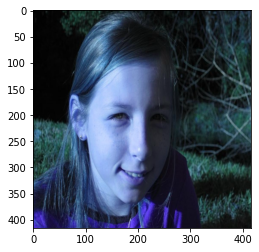

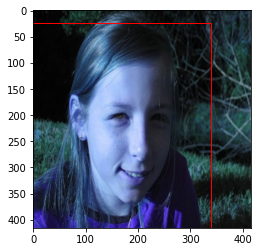

In [ ]:
img = cv2.resize(cv2.imread(train_paths[3]), (416,416))
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=True)
r = blob[0, 0, :, :]

net.setInput(blob)
outputs = net.forward(ln)
plt.imshow(img)

#ADAPTED FROM: https://colab.research.google.com/drive/1dYwDAjSgzj_9MQEZ4Uu3nR_9K-4zlsqQ#scrollTo=Bn95xJWPL63i
def yolo(img):
    coco = "/content/coco.names"
    LABELS = open(coco).read().strip().split("\n")
    COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),dtype="uint8")

    blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416),
        swapRB=True, crop=True)
    net.setInput(blob)
    layerOutputs = net.forward(ln)


    h_img = img.shape[0]
    w_img = img.shape[1]

    boxes = []
    confidences = []
    classIDs = []

    for output in layerOutputs:
        for detection in output:

            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            if confidence > .5:
                print(LABELS[classID], confidence)
   
                box = detection[0:4] * np.array([w_img, h_img, w_img, h_img])
                (centerX, centerY, w, h) = box.astype("int")

                x = int(centerX - (w / 2))
                y = int(centerY - (h / 2))

                print(x, y, int(w), int(h))
                boxes.append([x, y, int(w), int(h)])
                confidences.append(float(confidence))
                classIDs.append(classID)

    idxs = cv2.dnn.NMSBoxes(boxes, confidences, .5, .4 )
    if len(idxs) > 0:
        fig,ax = plt.subplots(1)
        ax.imshow(img)
        for i in idxs.flatten():
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])
            color = [int(c) for c in COLORS[classIDs[i]]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            rect = patches.Rectangle((x,y),x+w,y+h,linewidth=1,edgecolor='r',facecolor='none')
            ax.add_patch(rect)
            
        plt.show()

yolo(img)

In [ ]:
wider_yolo_config = "/content/drive/My Drive/wider_face_yolov3.cfg"